In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import requests
import geopandas as gpd
from io import StringIO
from shapely.geometry import Point, LineString
import folium
%matplotlib inline
pd.set_option('display.max_columns', None)

### Connect to API Data

In [2]:
url = 'https://earthquake.usgs.gov/fdsnws/event/1/query'

In [3]:
payload = {'format' :'csv',
          'starttime':'1900-01-01',
          'minlatitude':'33.203247',
          'maxlatitude':'38.821584',
          'minlongitude':'-93.258663',
          'maxlongitude':'-80.398366',
          'limit': [1,20000]}

In [4]:
r = requests.get(url=url, params=payload)

In [5]:
usgs_data = pd.read_csv(StringIO(r.text))

In [6]:
usgs_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-10-31T10:46:51.870Z,36.511333,-81.076833,0.46,1.14,md,7.0,260.0,0.007249,0.17,se,se60313557,2020-10-31T14:17:54.930Z,"4 km E of Sparta, North Carolina",earthquake,0.99,1.50,0.321,6.0,reviewed,se,se
1,2020-10-31T06:07:52.610Z,36.494000,-81.096667,0.16,-0.86,md,4.0,141.0,0.015370,0.04,se,se60313552,2020-10-31T14:20:36.050Z,"2 km ESE of Sparta, North Carolina",earthquake,1.25,7.92,0.207,4.0,reviewed,se,se
2,2020-10-31T05:42:29.950Z,36.512333,-81.088167,0.69,1.22,md,8.0,193.0,0.011000,0.17,se,se60313547,2020-10-31T14:30:02.440Z,"3 km ENE of Sparta, North Carolina",earthquake,0.72,1.60,0.270,6.0,reviewed,se,se
3,2020-10-31T05:28:49.030Z,36.517333,-81.080833,0.08,0.75,md,5.0,304.0,0.013140,0.07,se,se60313542,2020-10-31T14:36:32.760Z,"3 km ENE of Sparta, North Carolina",earthquake,0.70,7.98,0.309,5.0,reviewed,se,se
4,2020-10-30T02:54:01.510Z,36.444000,-91.419000,4.86,2.08,md,14.0,125.0,0.430300,0.17,nm,nm60116223,2020-10-30T14:37:00.590Z,"12 km ESE of Mammoth Spring, Arkansas",earthquake,0.50,3.93,0.184,13.0,reviewed,nm,nm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14077,1903-11-04T19:14:00.000Z,36.500000,-89.800000,NaN,5.10,fa,NaN,NaN,NaN,NaN,ushis,ushis423,2018-06-04T20:43:44.000Z,Missouri,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
14078,1903-11-04T18:18:00.000Z,36.500000,-89.500000,NaN,4.60,fa,NaN,NaN,NaN,NaN,ushis,ushis422,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
14079,1903-02-09T00:21:00.000Z,37.800000,-89.300000,NaN,4.90,fa,NaN,NaN,NaN,NaN,ushis,ushis414,2018-06-04T20:43:44.000Z,Illinois,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
14080,1902-01-24T10:48:00.000Z,38.600000,-90.300000,NaN,4.50,fa,NaN,NaN,NaN,NaN,ushis,ushis401,2018-06-04T20:43:44.000Z,Missouri,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc


### Create Filtered Variables

In [8]:
TN_Earthquakes = usgs_data[usgs_data['place'].str.contains('Tennessee')]

In [9]:
tn_list = ['Tennessee','Illinois', 'Indiana','North Carolina','South Carolina', 'West Virginia','Virginia','Kentucky', 'Missouri', 'Arkansas', 'Mississippi', 'Alabama', 'Georgia']
state_regex = "|".join(tn_list)
Neighbor_quakes = usgs_data[usgs_data['place'].str.contains(state_regex)]
Neighbor_quakes

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2020-10-31T10:46:51.870Z,36.511333,-81.076833,0.46,1.14,md,7.0,260.0,0.007249,0.17,se,se60313557,2020-10-31T14:17:54.930Z,"4 km E of Sparta, North Carolina",earthquake,0.99,1.50,0.321,6.0,reviewed,se,se
1,2020-10-31T06:07:52.610Z,36.494000,-81.096667,0.16,-0.86,md,4.0,141.0,0.015370,0.04,se,se60313552,2020-10-31T14:20:36.050Z,"2 km ESE of Sparta, North Carolina",earthquake,1.25,7.92,0.207,4.0,reviewed,se,se
2,2020-10-31T05:42:29.950Z,36.512333,-81.088167,0.69,1.22,md,8.0,193.0,0.011000,0.17,se,se60313547,2020-10-31T14:30:02.440Z,"3 km ENE of Sparta, North Carolina",earthquake,0.72,1.60,0.270,6.0,reviewed,se,se
3,2020-10-31T05:28:49.030Z,36.517333,-81.080833,0.08,0.75,md,5.0,304.0,0.013140,0.07,se,se60313542,2020-10-31T14:36:32.760Z,"3 km ENE of Sparta, North Carolina",earthquake,0.70,7.98,0.309,5.0,reviewed,se,se
4,2020-10-30T02:54:01.510Z,36.444000,-91.419000,4.86,2.08,md,14.0,125.0,0.430300,0.17,nm,nm60116223,2020-10-30T14:37:00.590Z,"12 km ESE of Mammoth Spring, Arkansas",earthquake,0.50,3.93,0.184,13.0,reviewed,nm,nm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14076,1905-08-22T05:08:00.000Z,37.200000,-89.300000,NaN,4.80,fa,NaN,NaN,NaN,NaN,ushis,ushis439,2018-06-04T20:43:44.000Z,Illinois,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
14077,1903-11-04T19:14:00.000Z,36.500000,-89.800000,NaN,5.10,fa,NaN,NaN,NaN,NaN,ushis,ushis423,2018-06-04T20:43:44.000Z,Missouri,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
14078,1903-11-04T18:18:00.000Z,36.500000,-89.500000,NaN,4.60,fa,NaN,NaN,NaN,NaN,ushis,ushis422,2018-06-04T20:43:44.000Z,Tennessee,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc
14079,1903-02-09T00:21:00.000Z,37.800000,-89.300000,NaN,4.90,fa,NaN,NaN,NaN,NaN,ushis,ushis414,2018-06-04T20:43:44.000Z,Illinois,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sc


In [10]:
TN_Earthquakes.groupby('place')['place'].agg('count').sort_values(ascending=False)

place
9km NW of Tiptonville, Tennessee      116
3km ENE of Ridgely, Tennessee          78
5km ESE of Ridgely, Tennessee          72
5km NW of Ridgely, Tennessee           67
5km SE of Ridgely, Tennessee           62
                                     ... 
5km E of East Cleveland, Tennessee      1
5km E of Apison, Tennessee              1
5 km WSW of Tiptonville, Tennessee      1
5 km WNW of Ridgely, Tennessee          1
0 km NE of Ridgely, Tennessee           1
Name: place, Length: 1317, dtype: int64

### Create Point Geometries

In [11]:
TN_Earthquakes['geometry'] = TN_Earthquakes.apply(lambda row: Point(float(row.longitude), float(row.latitude)), axis = 1)


<ipython-input-11-d130eab0daf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TN_Earthquakes['geometry'] = TN_Earthquakes.apply(lambda row: Point(float(row.longitude), float(row.latitude)), axis = 1)


In [12]:
Neighbor_quakes['geometry'] = Neighbor_quakes.apply(lambda row: Point(float(row.longitude), float(row.latitude)), axis = 1)


<ipython-input-12-c8377845bac1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Neighbor_quakes['geometry'] = Neighbor_quakes.apply(lambda row: Point(float(row.longitude), float(row.latitude)), axis = 1)


###  Read in State and County Data

In [13]:
states = gpd.read_file('../dq3-earthquakes-very-success-2/Data/us_state/tl_2019_us_state.shp')
states

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266231560,489271086,+38.6472854,-080.6183274,"POLYGON ((-81.74725 39.09538, -81.74635 39.096..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138947364717,31362872853,+28.4574302,-082.4091477,"MULTIPOLYGON (((-86.38865 30.99418, -86.38385 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143779863817,6215723896,+40.1028754,-089.1526108,"POLYGON ((-91.18529 40.63780, -91.17510 40.643..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206230065476,18942261495,+46.3159573,-094.1996043,"POLYGON ((-96.78438 46.63050, -96.78434 46.630..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151726296,6979340970,+38.9466584,-076.6744939,"POLYGON ((-77.45881 39.22027, -77.45866 39.220..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677787140,1323663210,+41.5974187,-071.5272723,"MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049897859,2391604238,+44.3484222,-114.5588538,"POLYGON ((-116.89971 44.84061, -116.89967 44.8..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23189198255,1026903434,+43.6726907,-071.5843145,"POLYGON ((-72.32990 43.60021, -72.32984 43.600..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125925929633,13463401534,+35.5397100,-079.1308636,"POLYGON ((-82.41674 36.07283, -82.41660 36.073..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23874197924,1030383955,+44.0685773,-072.6691839,"POLYGON ((-73.31328 44.26413, -73.31274 44.265..."


In [14]:
tn_counties = gpd.read_file('../dq3-earthquakes-very-success-2/Data/tn_counties/tl_2018_tn_county.shp')
tn_counties

,FID,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,SHAPE_Leng,SHAPE_Area,geometry
0,30,47,065,01639749,47065,Hamilton,Hamilton County,06,H1,G4020,174,16860,None,A,1.404654e+09,86645833.0,+35.1634720,-085.2018432,1.988717,0.147573,"POLYGON ((-85.29255 35.26292, -85.29239 35.263..."
1,65,47,115,01639770,47115,Marion,Marion County,06,H1,G4020,174,16860,None,A,1.290468e+09,36484703.0,+35.1334215,-085.6183990,1.631306,0.131228,"POLYGON ((-85.54388 35.30238, -85.54187 35.301..."
2,68,47,185,01639800,47185,White,White County,06,H1,G4020,None,None,None,A,9.755921e+08,7113369.0,+35.9270486,-085.4557854,1.870463,0.098137,"MULTIPOLYGON (((-85.64136 35.84077, -85.63988 ..."
3,129,47,129,01639778,47129,Morgan,Morgan County,06,H1,G4020,314,28940,None,A,1.352440e+09,823018.0,+36.1386970,-084.6392616,1.906032,0.135494,"POLYGON ((-84.79101 36.05854, -84.79185 36.059..."
4,182,47,013,01639728,47013,Campbell,Campbell County,06,H1,G4020,314,28940,None,A,1.243616e+09,46494677.0,+36.4015922,-084.1592495,2.054030,0.129608,"POLYGON ((-84.32222 36.39287, -84.32249 36.393..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,3079,47,039,01639739,47039,Decatur,Decatur County,06,H1,G4020,None,None,None,A,8.647390e+08,28503792.0,+35.6031362,-088.1102917,1.668685,0.088847,"POLYGON ((-88.18739 35.66371, -88.18738 35.663..."
91,3084,47,119,01639772,47119,Maury,Maury County,06,H1,G4020,400,34980,None,A,1.588021e+09,6319196.0,+35.6156963,-087.0777632,2.159318,0.158610,"POLYGON ((-87.31715 35.55287, -87.31705 35.553..."
92,3102,47,047,01639742,47047,Fayette,Fayette County,06,H1,G4020,368,32820,None,A,1.825359e+09,3774866.0,+35.1969933,-089.4138027,1.735508,0.181039,"POLYGON ((-89.63774 35.17934, -89.63768 35.181..."
93,3107,47,063,01648576,47063,Hamblen,Hamblen County,06,H1,G4020,314,34100,None,A,4.174773e+08,37851130.0,+36.2183967,-083.2660711,1.495609,0.045636,"POLYGON ((-83.38984 36.26275, -83.38940 36.263..."


In [15]:
tn_counties_pop = pd.read_csv('../dq3-earthquakes-very-success-2/Data/TN County Populations.csv')

tn_counties_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  95 non-null     int64  
 1   name        95 non-null     object 
 2   population  95 non-null     float64
 3   growthrate  95 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [16]:
#Merge population and county data
tn_counties = pd.merge(tn_counties,tn_counties_pop,left_on='NAME', right_on='name')

In [17]:
#filter state for TN and neighboring states
tn_states = states[states['NAME'].isin(tn_list)]

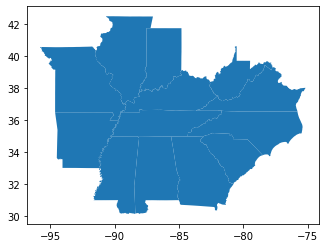

In [18]:
tn_states.plot();

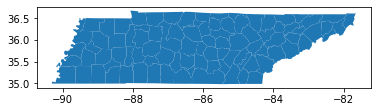

In [19]:
tn_counties.plot();

In [20]:
faults = gpd.read_file('../dq3-earthquakes-very-success-2/Data/fault_map/Qfaults_US_Database.shp')

### Create Geodataframes

In [23]:
TN_Earthquakes = gpd.GeoDataFrame(TN_Earthquakes, crs = tn_states.crs, geometry = TN_Earthquakes.geometry)
type(TN_Earthquakes)

geopandas.geodataframe.GeoDataFrame

In [24]:
Neighbor_quakes = gpd.GeoDataFrame(Neighbor_quakes, crs = tn_states.crs, geometry = Neighbor_quakes.geometry)
type(Neighbor_quakes)

geopandas.geodataframe.GeoDataFrame

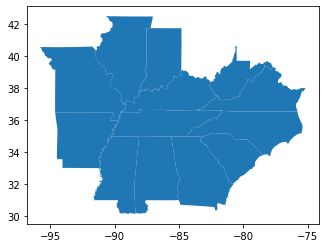

In [25]:
tn_states = tn_states.to_crs(epsg=4326)
tn_states.plot();

### Sjoin Earthquake and TN data

In [26]:
tn_quakes_states = gpd.sjoin(TN_Earthquakes, tn_states,op='intersects')

<ipython-input-26-e33b777b0ef8>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  tn_quakes_states = gpd.sjoin(TN_Earthquakes, tn_states,op='intersects')


In [27]:
neighbor_quakes_states = gpd.sjoin(Neighbor_quakes, tn_states,op='intersects')

<ipython-input-27-1053d7082612>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  neighbor_quakes_states = gpd.sjoin(Neighbor_quakes, tn_states,op='intersects')


### Plots

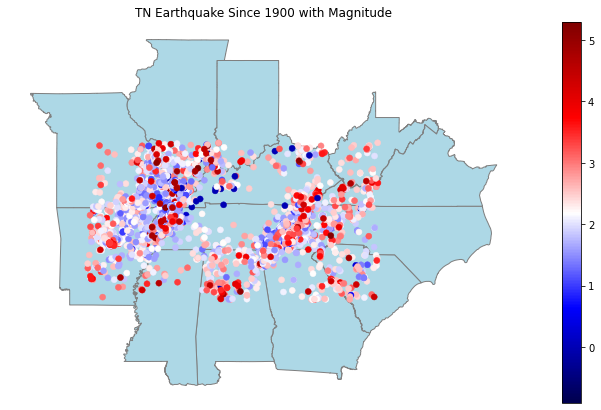

In [28]:
ax = tn_states.plot(figsize=(15,7), color = 'lightblue',edgecolor='grey')
neighbor_quakes_states.plot(ax = ax, column = 'mag', linewidth=0.5,legend=True,cmap='seismic')
ax.set_title('TN Earthquake Since 1900 with Magnitude')
plt.axis('off')
plt.show();


In [29]:
type(TN_Earthquakes)

geopandas.geodataframe.GeoDataFrame

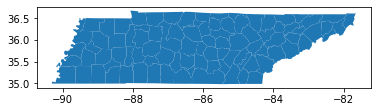

In [30]:
tn_counties = tn_counties.to_crs(epsg=4326)
tn_counties.plot();

In [31]:
tn_quakes_counties = gpd.sjoin(TN_Earthquakes, tn_counties,op='intersects')

<ipython-input-31-43602b6ec046>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  tn_quakes_counties = gpd.sjoin(TN_Earthquakes, tn_counties,op='intersects')


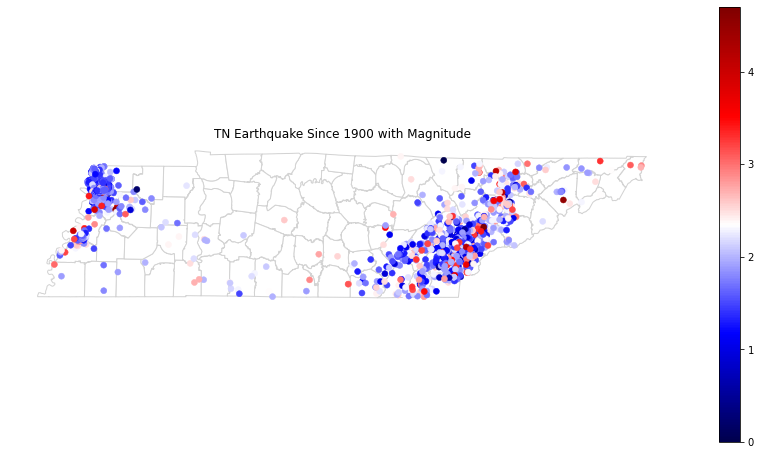

In [32]:
ax = tn_counties.plot(figsize=(15, 8), color = 'white',edgecolor='lightgrey')
tn_quakes_counties.plot(ax = ax, column = 'mag', linewidth=0.5,legend=True,cmap='seismic')
ax.set_title('TN Earthquake Since 1900 with Magnitude')
plt.axis('off')
plt.show()



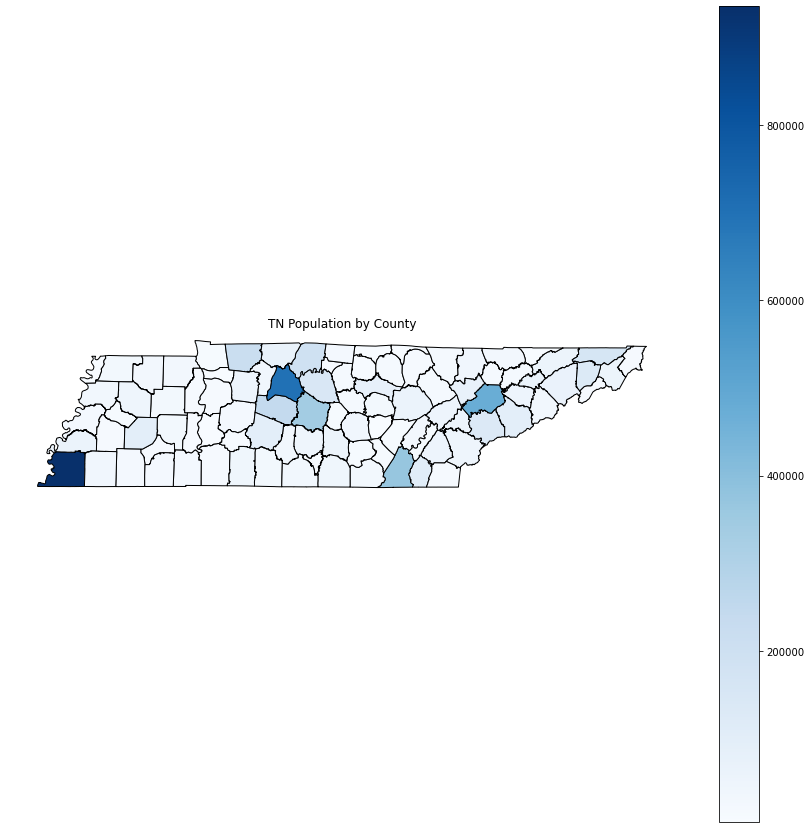

In [35]:
ax = tn_counties.plot(figsize=(15, 15),
                      column='population',
                      cmap = 'Blues',
                      legend=True,
                     edgecolor='Black')
ax.set_title('TN Population by County')
plt.axis('off')
plt.show()

In [36]:
df_tn_quakes_counties = pd.DataFrame(tn_quakes_counties)

### Create Point and Line data for faults and cities

In [38]:
data = [['Nashville',36.1627, -86.7816],['Memphis',35.1495, -90.0490],['Chattanooga',35.0456, -85.3097],['Knoxville',35.9606, -83.9207]]
tn_coordinates = pd.DataFrame(data, columns = ['city','lat', 'lng']) 
tn_coordinates = gpd.GeoDataFrame(tn_coordinates, geometry=gpd.points_from_xy(tn_coordinates.lng, tn_coordinates.lat),crs='epsg:4326')

tn_coordinates

,city,lat,lng,geometry
0,Nashville,36.1627,-86.7816,POINT (-86.78160 36.16270)
1,Memphis,35.1495,-90.0490,POINT (-90.04900 35.14950)
2,Chattanooga,35.0456,-85.3097,POINT (-85.30970 35.04560)
3,Knoxville,35.9606,-83.9207,POINT (-83.92070 35.96060)


In [39]:
tn_coordinates.to_crs(epsg=4326)
tn_coordinates.geometry.buffer(1000)


<ipython-input-39-421334f85f61>:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tn_coordinates.geometry.buffer(1000)


0    POLYGON ((913.218 36.163, 908.403 -61.854, 894...
1    POLYGON ((909.951 35.150, 905.136 -62.868, 890...
2    POLYGON ((914.690 35.046, 909.875 -62.972, 895...
3    POLYGON ((916.079 35.961, 911.264 -62.057, 896...
dtype: geometry

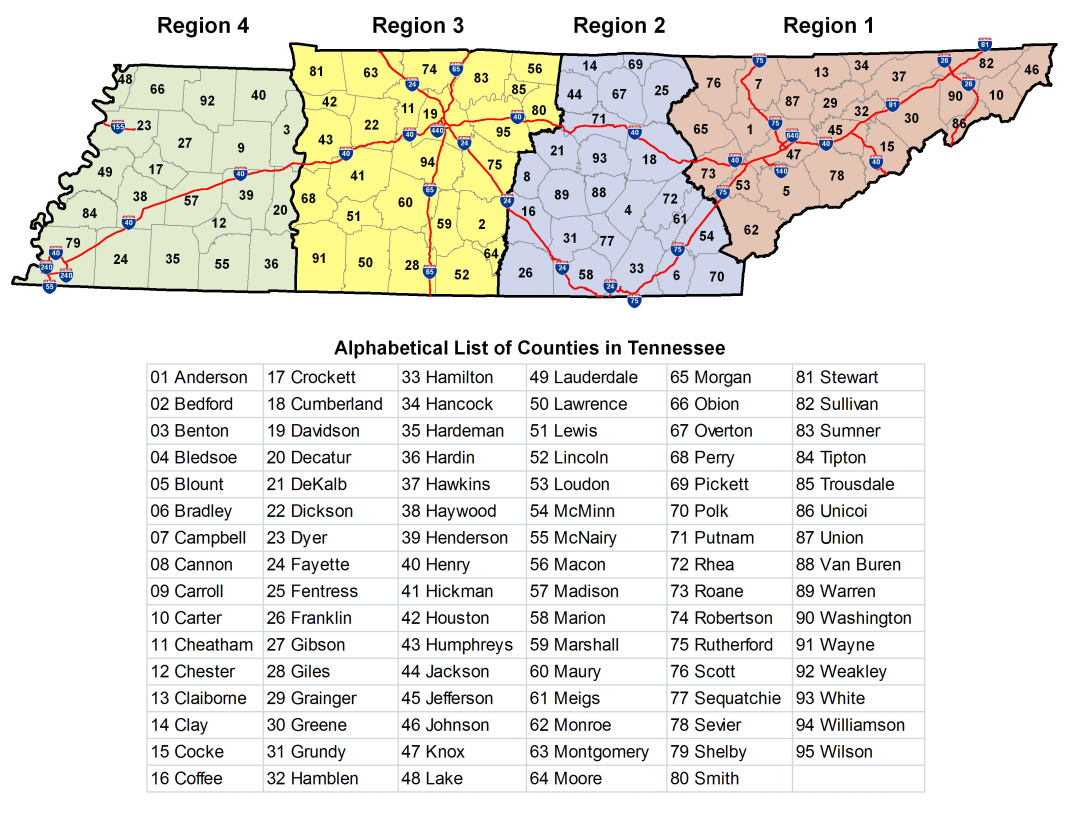

<ipython-input-42-7e32badb252a>:7: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tn_coordinates.buffer(.05).plot(ax = ax, color='Red')


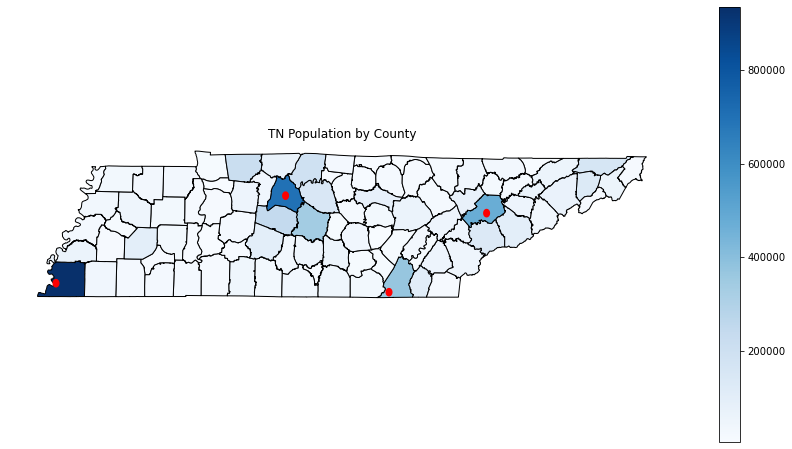

In [42]:
ax = tn_counties.plot(figsize=(15, 8),
                      column='population',
                      cmap = 'Blues',
                      legend=True,
                     edgecolor='Black')

tn_coordinates.buffer(.05).plot(ax = ax, color='Red')

ax.set_title('TN Population by County')
plt.axis('off')
plt.show()


plt.show()

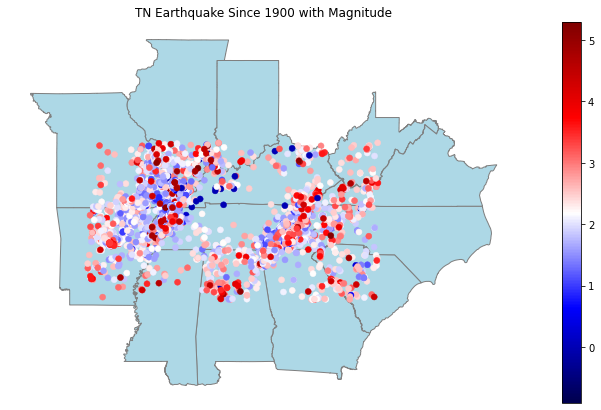

In [43]:
ax = tn_states.plot(figsize=(15,7), color = 'lightblue',edgecolor='grey')
neighbor_quakes_states.plot(ax = ax, column = 'mag', linewidth=0.5,legend=True,cmap='seismic')
ax.set_title('TN Earthquake Since 1900 with Magnitude')
plt.axis('off')
plt.show();


###P
data1 = [['New Madrid seismic zone',[36.474, -89.820][35.688,-90.317],
         ['New Madrid seismic zone center',36.134,-90.034],
         ['New Madrid seismic zone WCS Nashville',36.196,-89.331],
         ['New Madrid seismic zone WCS Memphis',35.475,-90.122],
         ['Pembroke faults center',37.367,-80.684],
         ['Pembroke faults WCS',37.201,-80.871],
         ]
faults = pd.DataFrame(data1, columns = ['fault','lat', 'lng']) 
faults

In [ ]:
seismic_zones1 = [['New Madrid seismic zone', LineString([Point(36.474, -89.820),Point(35.688,-90.317)])]
 ['East Tennessee Fault',LineString([Point(35.708106, -84.205755),Point(35.407844, -84.444192)])]]
seismic_zones = pd.DataFrame(seismic_zones1, columns = ['seismic_zone','geometry']) 

In [45]:
seismic_zones1 = pd.DataFrame([['New Madrid seismic zone', LineString([Point(-89.820,36.474),Point(-90.317,35.688)])]], columns = ['seismic_zone','geometry']) 
seismic_zones2 = pd.DataFrame([['East Tennessee Fault',LineString([Point(-84.205755,35.708106),Point(-84.444192,35.407844)])]], columns = ['seismic_zone','geometry']) 
seismic_zones = seismic_zones1.append(seismic_zones2, ignore_index = True) 
seismic_zones = gpd.GeoDataFrame(seismic_zones, crs="EPSG:4326", geometry='geometry')
type(seismic_zones)
seismic_zones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
seismic_zones1 = gpd.GeoDataFrame(seismic_zones1, crs="EPSG:4326", geometry='geometry')

In [50]:
seismic_zones2 = gpd.GeoDataFrame(seismic_zones2, crs="EPSG:4326", geometry='geometry')

<ipython-input-46-244e611fb25c>:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seismic_zones.buffer(.869565217).plot(ax = ax, color='Red',alpha=0.4)
<ipython-input-46-244e611fb25c>:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')


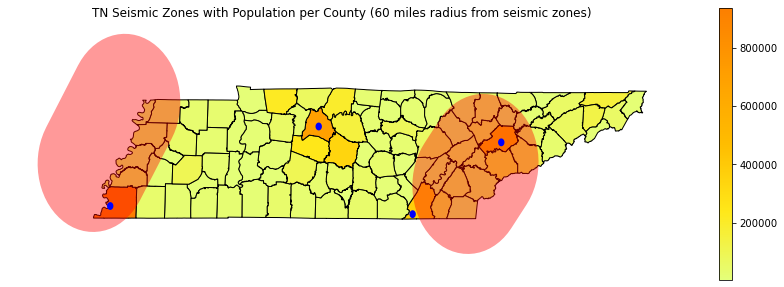

In [46]:
fig,ax=plt.subplots(figsize=(15, 5))
tn_counties.plot(ax=ax,
                      column='population',
                      cmap = 'Wistia',
                      legend=True,
                     edgecolor='Black')

seismic_zones.buffer(.869565217).plot(ax = ax, color='Red',alpha=0.4)
tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')

ax.set_title('TN Seismic Zones with Population per County (60 miles radius from seismic zones)')
plt.axis('off')
plt.show()


plt.show()

<ipython-input-47-cb1067427cf7>:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seismic_zones.buffer(0.362318841).plot(ax = ax, color='Red',alpha=0.4)
<ipython-input-47-cb1067427cf7>:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')


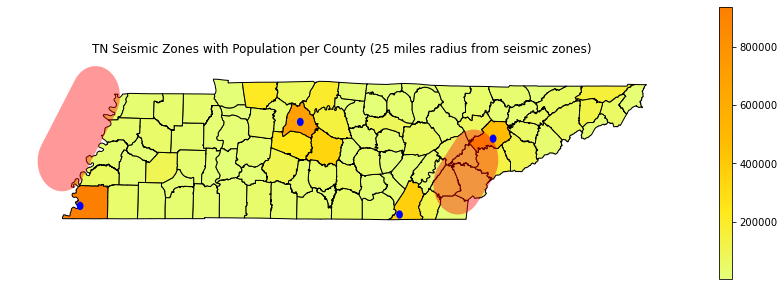

In [47]:
#5.5 Magnitude Earthquake with 25 mile radius
fig,ax=plt.subplots(figsize=(15, 5))
tn_counties.plot(ax=ax,
                      column='population',
                      cmap = 'Wistia',
                      legend=True,
                     edgecolor='Black')

seismic_zones.buffer(0.362318841).plot(ax = ax, color='Red',alpha=0.4)
tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')

ax.set_title('TN Seismic Zones with Population per County (25 miles radius from seismic zones)')
plt.axis('off')
plt.show()


plt.show()

<ipython-input-59-81e39d06fb50>:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seismic_zones1.buffer(.869565217).plot(ax = ax, color='Blue',alpha=0.2)
<ipython-input-59-81e39d06fb50>:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seismic_zones1.buffer(0.362318841).plot(ax = ax, color='Red',alpha=0.4)
<ipython-input-59-81e39d06fb50>:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')


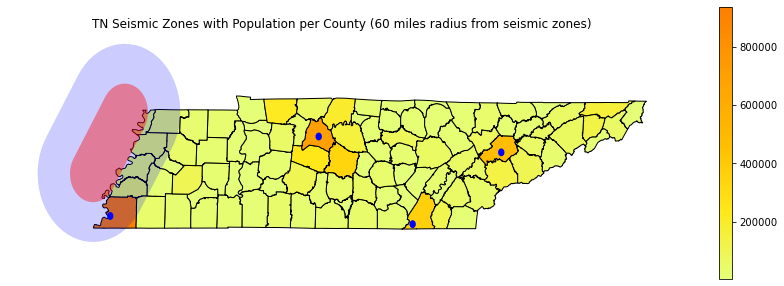

In [59]:
fig,ax=plt.subplots(figsize=(15, 5))
tn_counties.plot(ax=ax,
                      column='population',
                      cmap = 'Wistia',
                      legend=True,
                     edgecolor='Black')

seismic_zones1.buffer(.869565217).plot(ax = ax, color='Blue',alpha=0.2)
seismic_zones1.buffer(0.362318841).plot(ax = ax, color='Red',alpha=0.4)
tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')

ax.set_title('TN Seismic Zones with Population per County (60 miles radius from seismic zones)')
plt.axis('off')
plt.show()


plt.show()

<ipython-input-58-113ab180bbe7>:8: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seismic_zones2.buffer(.869565217).plot(ax = ax, color='Blue',alpha=0.2)
<ipython-input-58-113ab180bbe7>:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seismic_zones2.buffer(0.362318841).plot(ax = ax, color='Red',alpha=0.4)
<ipython-input-58-113ab180bbe7>:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')


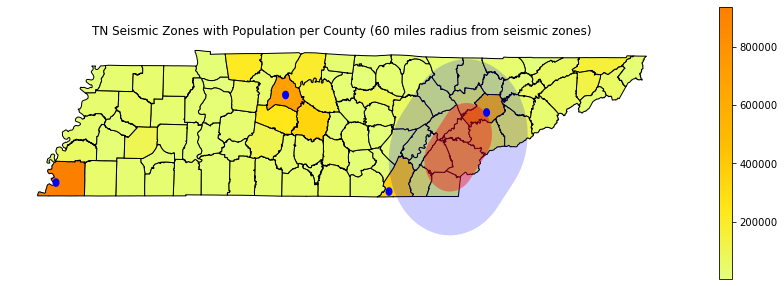

In [58]:
fig,ax=plt.subplots(figsize=(15, 5))
tn_counties.plot(ax=ax,
                      column='population',
                      cmap = 'Wistia',
                      legend=True,
                     edgecolor='Black')

seismic_zones2.buffer(.869565217).plot(ax = ax, color='Blue',alpha=0.2)
seismic_zones2.buffer(0.362318841).plot(ax = ax, color='Red',alpha=0.4)
tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')

ax.set_title('TN Seismic Zones with Population per County (60 miles radius from seismic zones)')
plt.axis('off')
plt.show()


plt.show()

<ipython-input-51-c602d9c64022>:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seismic_zones1.buffer(0.362318841).plot(ax = ax, color='Red',alpha=0.4)
<ipython-input-51-c602d9c64022>:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')


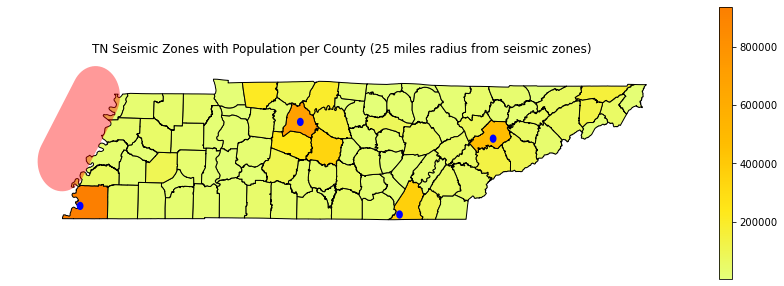

<ipython-input-56-4b8d4d6b5aec>:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seismic_zones2.buffer(0.362318841).plot(ax = ax, color='Black',alpha=0.4)
<ipython-input-56-4b8d4d6b5aec>:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')


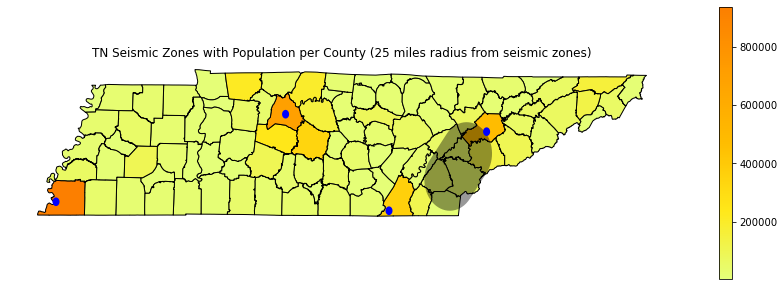

In [56]:
#5.5 Magnitude Earthquake with 25 mile radius
fig,ax=plt.subplots(figsize=(15, 5))
tn_counties.plot(ax=ax,
                      column='population',
                      cmap = 'Wistia',
                      legend=True,
                     edgecolor='Black')

seismic_zones2.buffer(0.362318841).plot(ax = ax, color='Black',alpha=0.4)
tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')

ax.set_title('TN Seismic Zones with Population per County (25 miles radius from seismic zones)')
plt.axis('off')
plt.show()


plt.show()

<ipython-input-48-7c1e5f0e1370>:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  seismic_zones.buffer(0.362318841).plot(ax = ax, color='Red',alpha=0.4)
<ipython-input-48-7c1e5f0e1370>:10: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')


NameError: name 'ctx' is not defined

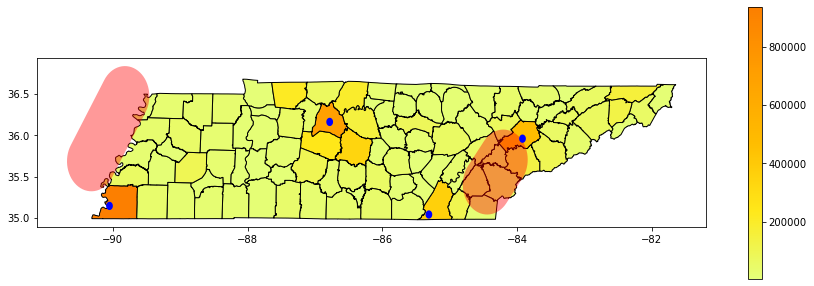

In [48]:
#5.5 Magnitude Earthquake with 25 mile radius
fig,ax=plt.subplots(figsize=(15, 5))
tn_counties.plot(ax=ax,
                      column='population',
                      cmap = 'Wistia',
                      legend=True,
                     edgecolor='Black')

seismic_zones.buffer(0.362318841).plot(ax = ax, color='Red',alpha=0.4)
tn_coordinates.buffer(.05).plot(ax = ax, color='Blue')
ctx.add_basemap(ax)

ax.set_title('TN Seismic Zones with Population per County (25 miles radius from seismic zones)')
plt.axis('off')
plt.show()


plt.show()

In [60]:
m = folium.Map(location=[36.392854, -86.166181])
m

In [ ]:
#Region 1 East < 36.109367, -84.598629
#Region 2 Central East < 36.392854 and > 36.109367 #36.392854, -86.166181
#Region 3 Central West < 36.021922 and > 36.392854 #36.021922, -87.991400
#Region 4 West > 36.021922
